In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata
import scanorama

# sittings
sns.set_style("ticks",{'axes.grid' : True})
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

# Load the data
Read the h5ad file we saved in the preprocessing and integration

In [2]:
# Load the saved AnnData object after Integrating
adata = sc.read_h5ad("characterized.h5ad")

adata

AnnData object with n_obs × n_vars = 157422 × 16975
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell_type', 'treatment', 'procedure', 'moffitt', 'stage'
    uns: 'Sample_colors', 'cell_type_colors', 'leiden', 'leiden_colors', 'markers', 'moffitt_colors', 'neighbors', 'procedure_colors', 'rank_genes_groups', 'stage_colors', 'treatment_colors', 'umap'
    obsm: 'Scanorama', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

# Filter out the non epithelial cells

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data f

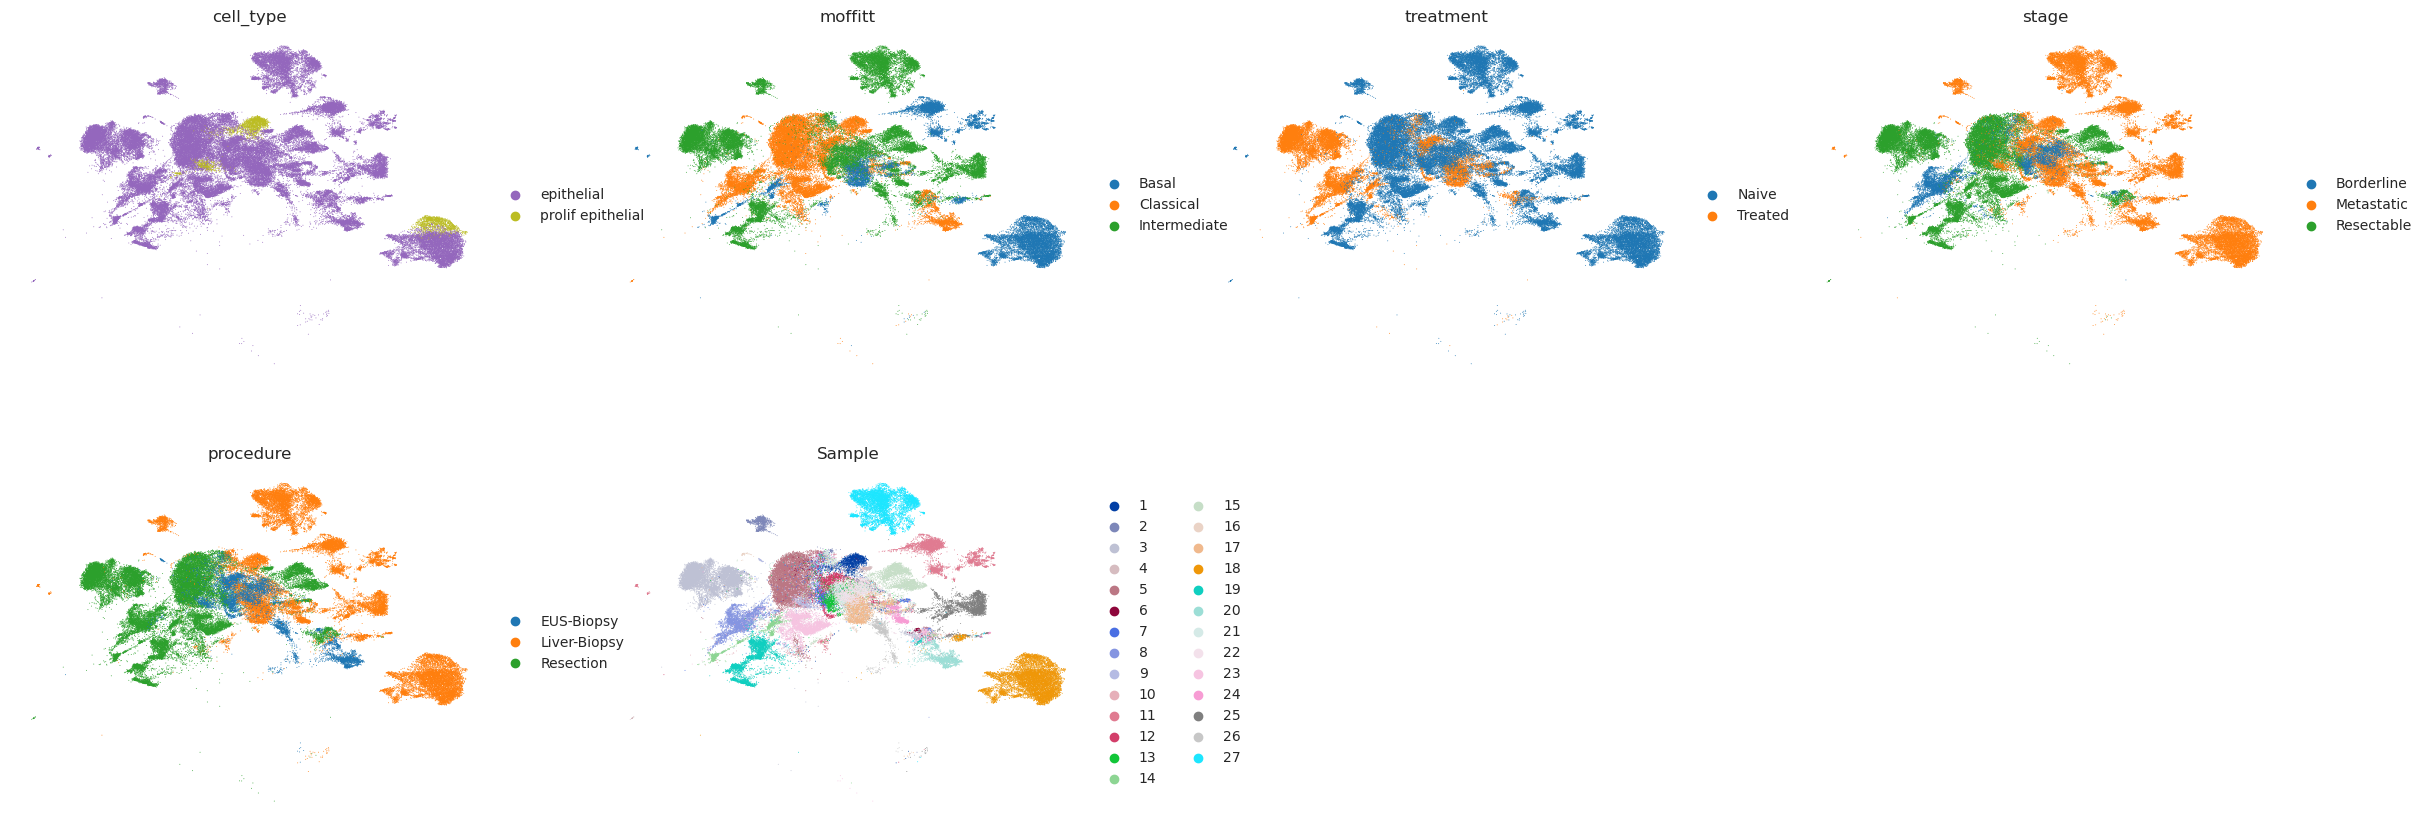

View of AnnData object with n_obs × n_vars = 70094 × 16975
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell_type', 'treatment', 'procedure', 'moffitt', 'stage'
    uns: 'Sample_colors', 'cell_type_colors', 'leiden', 'leiden_colors', 'markers', 'moffitt_colors', 'neighbors', 'procedure_colors', 'rank_genes_groups', 'stage_colors', 'treatment_colors', 'umap'
    obsm: 'Scanorama', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

In [3]:
# Filter out the non epithelial cells
adata = adata[(adata.obs.cell_type == 'epithelial') | (adata.obs.cell_type == 'prolif epithelial')]

# Plot the UMAP of the epithelial and proliferative epithelial cells
sc.pl.umap(adata, color = ['cell_type', 'moffitt', 'treatment', 'stage', 'procedure', 'Sample'], frameon = False)

adata

# Adjust the representation of proliferative epithelial cell type

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


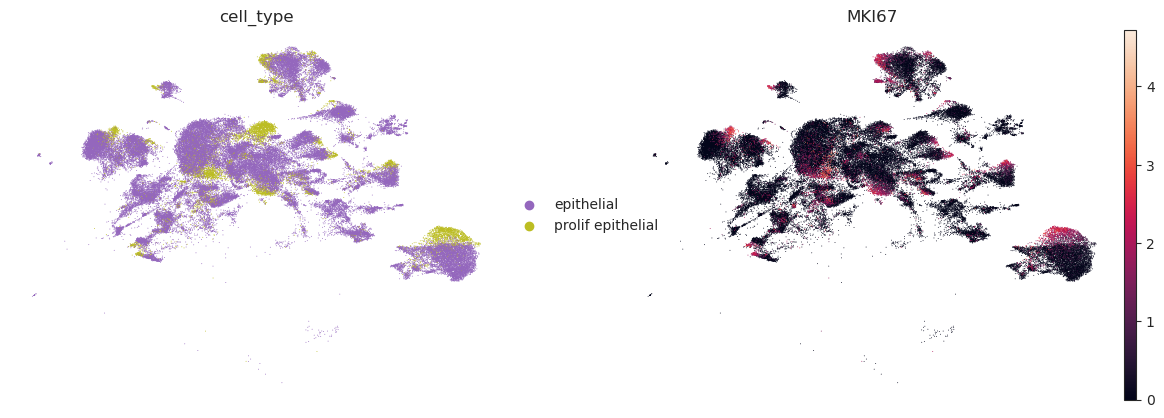

In [4]:
# Filter the data according to the expression of MKI67
MKI67_exp = adata.X.toarray()[:,np.where(adata.var_names == 'MKI67')[0][0]]

# Change the cell type of the cells that express high values of MKI67 to prolif epithelial
adata.obs.loc[MKI67_exp > 1, 'cell_type'] = 'prolif epithelial'

# Plot the UMAP of the cell type and the expression of MKI67
sc.pl.umap(adata, color = ['cell_type', 'MKI67'], frameon = False)

# Categorize the cells according to their subtype using marker genes 
* Classical (express KRT19 and GATA6)
* Basal (express KRT19 and KRT17)
* Intermediate (express KRT19, GATA6 and KRT17)

computing score 'Classical'


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


    finished: added
    'Classical', score of gene set (adata.obs).
    99 total control genes are used. (0:00:03)
computing score 'Basal'
    finished: added
    'Basal', score of gene set (adata.obs).
    50 total control genes are used. (0:00:01)


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


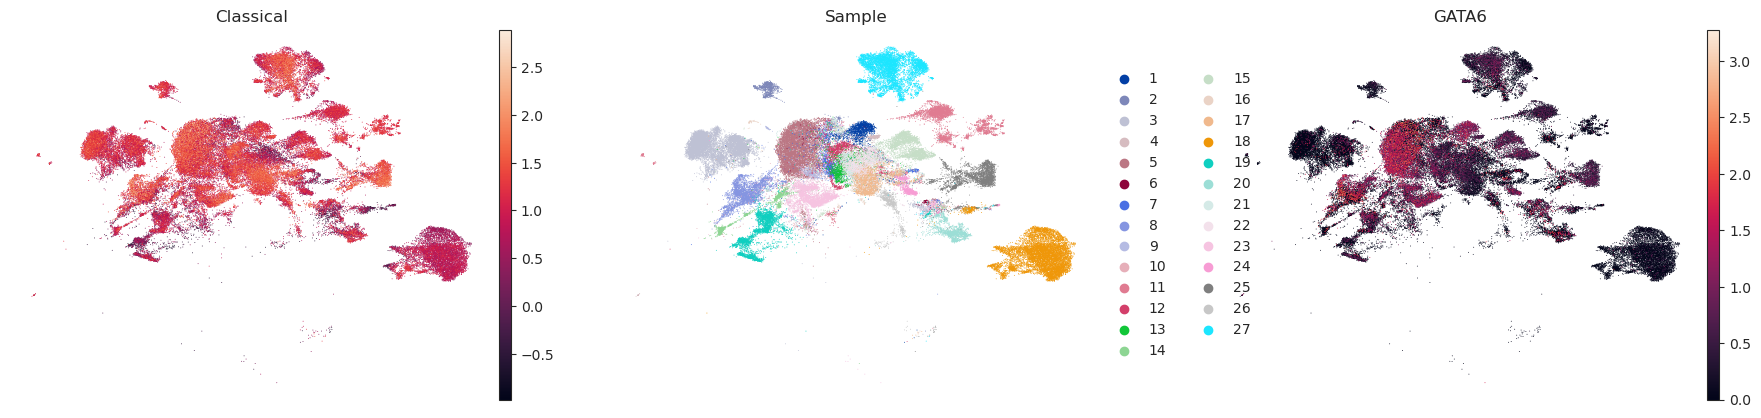

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


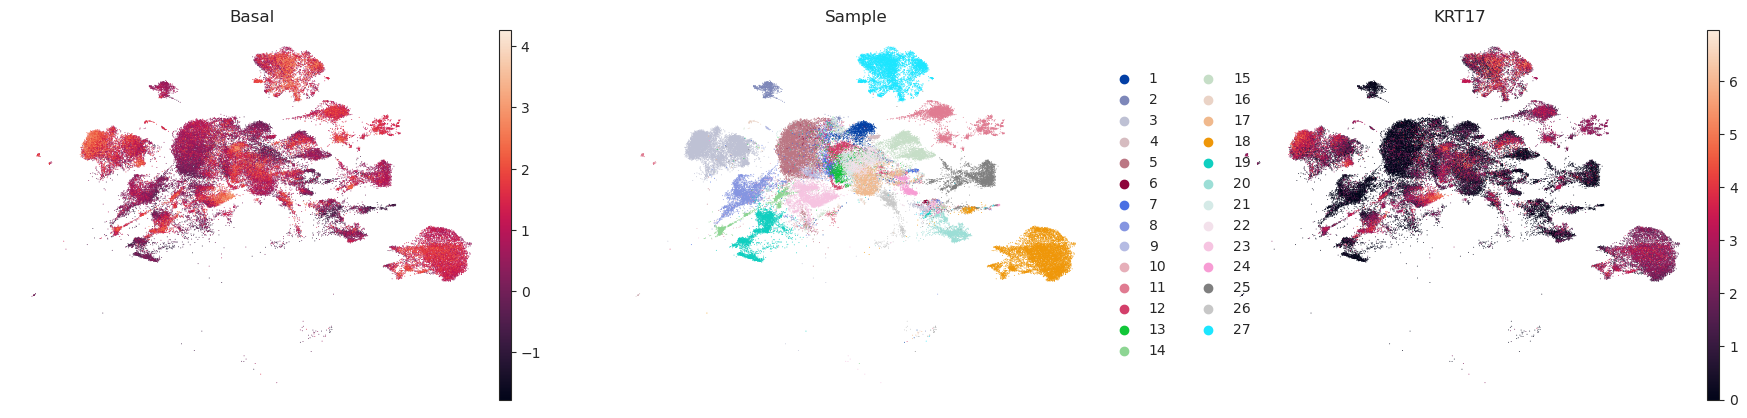

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


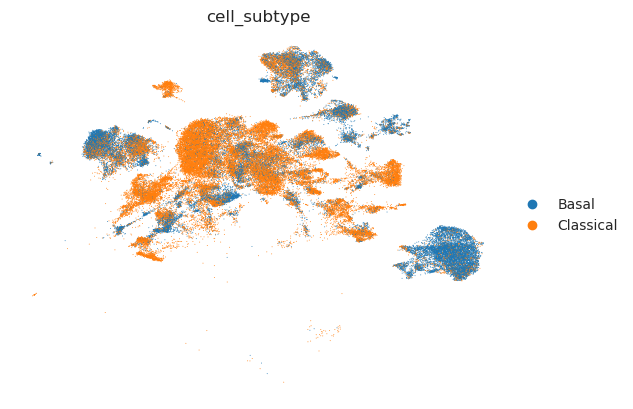

In [5]:
# Calculate cell type scores
sc.tl.score_genes(adata, gene_list=['KRT19', 'GATA6'], score_name='Classical')
sc.tl.score_genes(adata, gene_list=['KRT19', 'KRT17'], score_name='Basal')

# Visualize cell type scores
sc.pl.umap(adata, color=['Classical', 'Sample', 'GATA6'], frameon = False)
sc.pl.umap(adata, color=['Basal', 'Sample', 'KRT17'], frameon = False)

# Identify the celltype according to maximum score
adata.obs['cell_subtype'] = adata.obs[['Classical', 'Basal']].apply(lambda row: row.idxmax(), axis=1)

# Visualize the results on the UMAP of CAFs
sc.pl.umap(adata, color='cell_subtype', frameon = False)

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


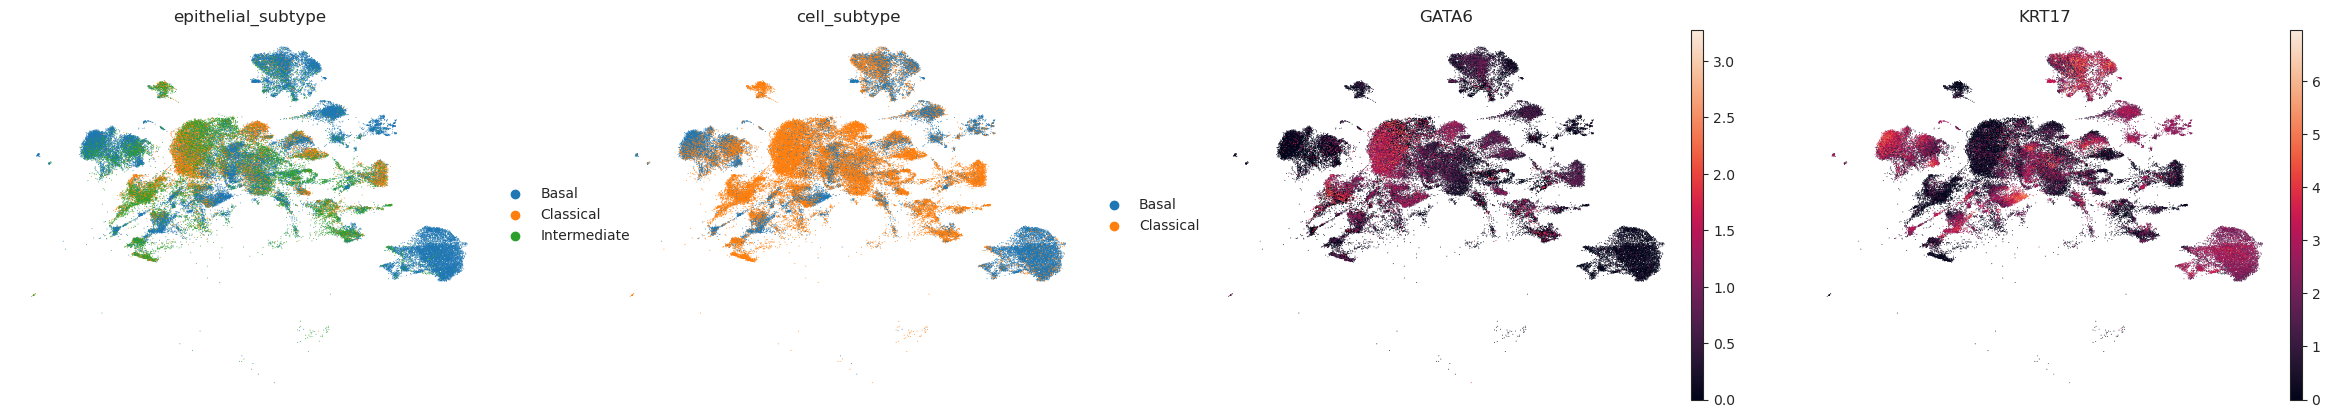

In [6]:
# Define the basal score for each cell as the difference between the expression of KRT17 and GATA6
adata.obs['Basal_score'] = adata.X.toarray()[:,np.where(adata.var_names=='KRT17')[0][0]] - adata.X.toarray()[:,np.where(adata.var_names=='GATA6')[0][0]]

# Add the epithelial subtype for each cell according to it's basal score
adata.obs['epithelial_subtype'] = ["Classical" if score < -0.01 else "Basal" if score > 0.01 else "Intermediate" for score in adata.obs['Basal_score']]

# Plot the UMAP of the epithelial subtype and the expression of GATA6 and KRT17
sc.pl.umap(adata, color = ['epithelial_subtype', 'cell_subtype', 'GATA6', 'KRT17'], frameon = False, save=f"epithelial_subtype_with_genes.png")

# Save the umap image for the epithelial subtype

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


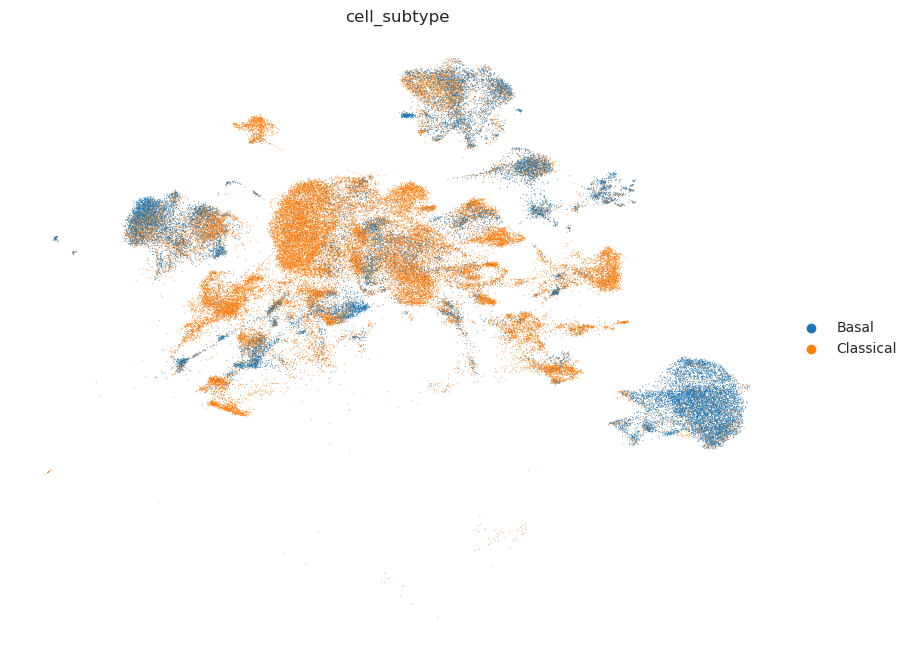

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


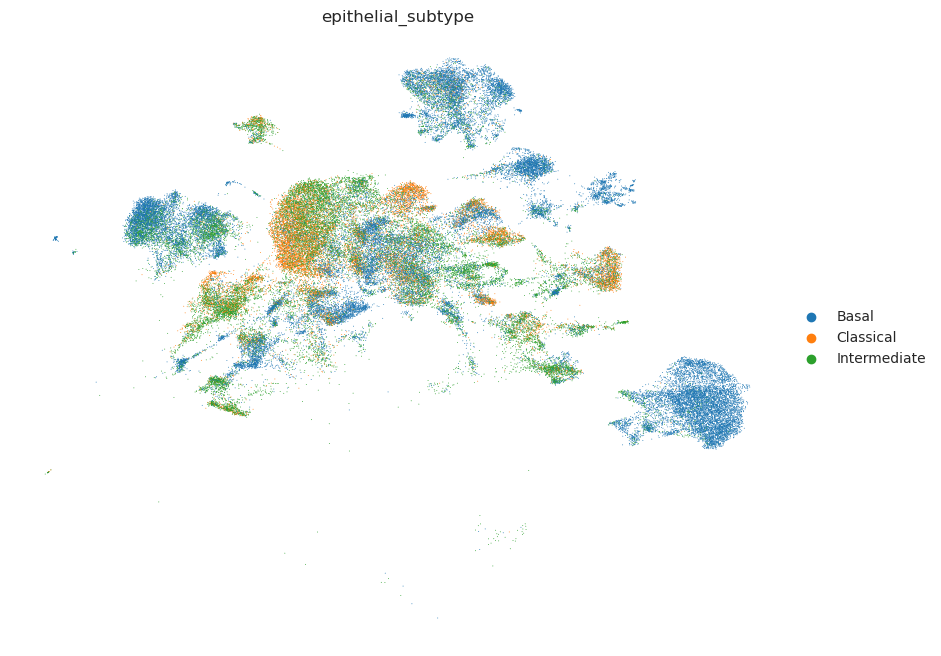

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data f

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


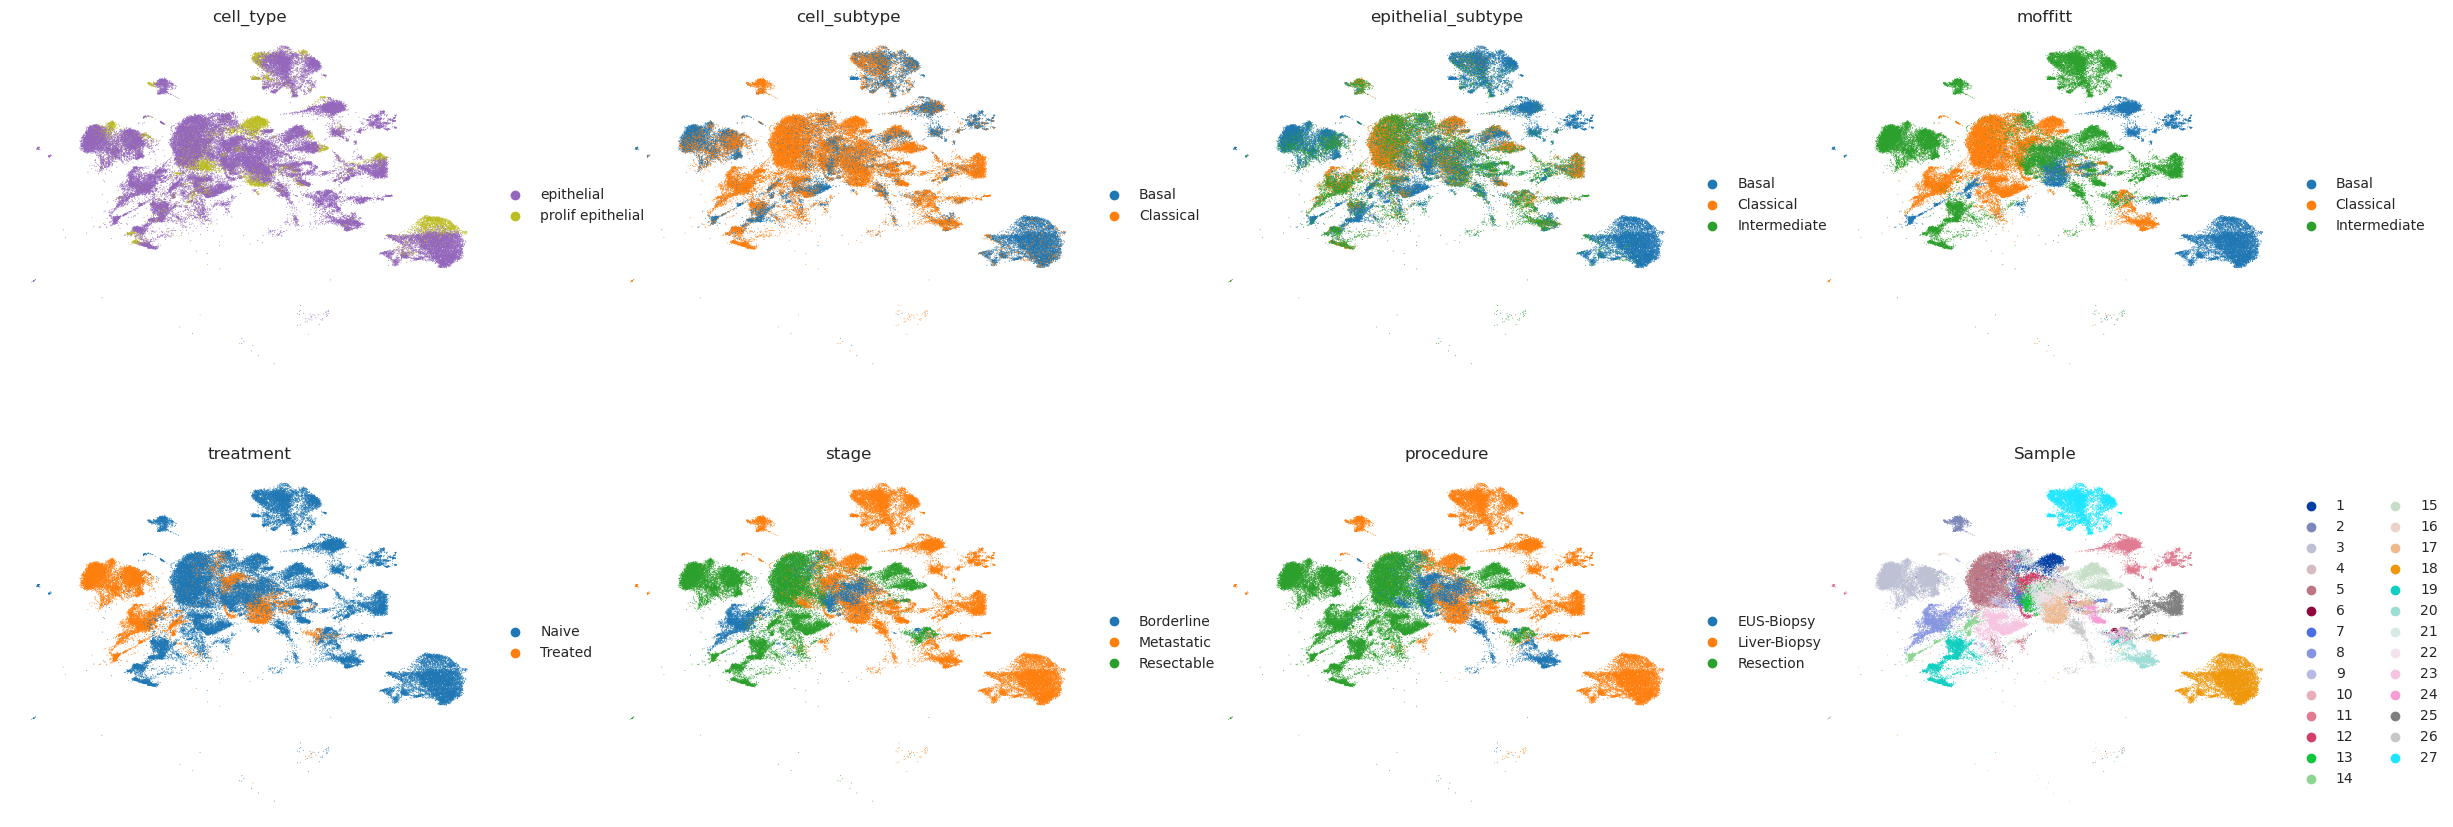

In [7]:
# UMAP cell subtype alone
_, axs = plt.subplots(figsize=(10,8))
sc.pl.umap(adata, color = 'cell_subtype', frameon = False, save=f"epithelial_subtype.png", ax=axs)

# UMAP epithelial subtype alone
_, axs = plt.subplots(figsize=(10,8))
sc.pl.umap(adata, color = 'epithelial_subtype', frameon = False, save=f"epithelial_subtype_with_intermediat.png", ax=axs)

# UMAP of the epithelial and proliferative epithelial cells and all other categories
sc.pl.umap(adata, color = ['cell_type', 'cell_subtype', 'epithelial_subtype', 'moffitt', 'treatment', 'stage', 'procedure', 'Sample'], frameon = False, save=f"epithelial_all.png")

# Save the AnnData object in h5ad format

In [8]:
adata.write_h5ad('Epithelial_subtype.h5ad')